In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("diabetes_pima_india.csv")
df.head()
#pedigree= chances based on family history from 0.08 to 2.42

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
#Units and way of measurement with column attributes for ease
df.columns = ['Pregnancies','Glucose(2hr)','BloodPress_Diastolic(mm hg)','SkinThickness(mm)','Insulin(muU/ml)','BMI','DiabetesPedigreeFunction','Age','Outcome']
df.duplicated().sum()
df.describe()
#unusual : skin thickness , BP , Glucose , BMI cant be zero for a living person
#INSULIN levels can drop to zero for diabetic people but not for NON-DIABETIC

Pregnancies  Glucose(2hr)  BloodPress_Diastolic(mm hg)  \
count   768.000000    768.000000                   768.000000   
mean      3.845052    120.894531                    69.105469   
std       3.369578     31.972618                    19.355807   
min       0.000000      0.000000                     0.000000   
25%       1.000000     99.000000                    62.000000   
50%       3.000000    117.000000                    72.000000   
75%       6.000000    140.250000                    80.000000   
max      17.000000    199.000000                   122.000000   

       SkinThickness(mm)  Insulin(muU/ml)         BMI  \
count         768.000000       768.000000  768.000000   
mean           20.536458        79.799479   31.992578   
std            15.952218       115.244002    7.884160   
min             0.000000         0.000000    0.000000   
25%             0.000000         0.000000   27.300000   
50%            23.000000        30.500000   32.000000   
75%            32.000000       127.250000   36.600000   
max            99.000000       846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [3]:
sample_df = df.replace(0,None)
sample_df.info()
#mean of skin thickness & insulin will be affected by large no. of Non-recorded zero values
print("      -------------------     ") 
print(sample_df['SkinThickness(mm)'].mean())
print(sample_df['Insulin(muU/ml)'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Pregnancies                  657 non-null    object 
 1   Glucose(2hr)                 763 non-null    object 
 2   BloodPress_Diastolic(mm hg)  733 non-null    object 
 3   SkinThickness(mm)            541 non-null    object 
 4   Insulin(muU/ml)              394 non-null    object 
 5   BMI                          757 non-null    object 
 6   DiabetesPedigreeFunction     768 non-null    float64
 7   Age                          768 non-null    int64  
 8   Outcome                      268 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 54.1+ KB
      -------------------     
29.153419593345657
155.5482233502538


In [4]:
df['Glucose(2hr)'].mask(df['Glucose(2hr)']==0,120.894531,inplace=True)
df['BloodPress_Diastolic(mm hg)'].mask(df['BloodPress_Diastolic(mm hg)']==0,69.105469,inplace=True)
df['BMI'].mask(df['BMI']==0,31.992578,inplace=True)
df['SkinThickness(mm)'].mask(df['SkinThickness(mm)']==0,29.153419,inplace=True)
df['Insulin(muU/ml)'].mask((df['Insulin(muU/ml)']==0) & (df['Outcome']==0),155.548223,inplace=True)

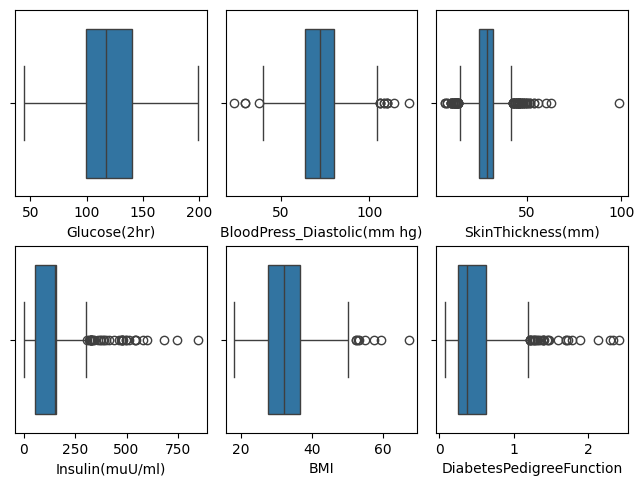

In [5]:
fig , axes = plt.subplots(2,3)
sns.boxplot(data=df,x='Glucose(2hr)',ax=axes[0,0])
sns.boxplot(data=df,x='BloodPress_Diastolic(mm hg)',ax=axes[0,1])
sns.boxplot(data=df,x='SkinThickness(mm)',ax=axes[0,2])
sns.boxplot(data=df,x='Insulin(muU/ml)',ax = axes[1,0])
sns.boxplot(data=df,x='BMI',ax = axes[1,1])
sns.boxplot(data=df,x='DiabetesPedigreeFunction',ax = axes[1,2])
fig.tight_layout(pad=0.5)
plt.show()

In [6]:
q1_bp = np.percentile(df['BloodPress_Diastolic(mm hg)'],25)
q3_bp = np.percentile(df['BloodPress_Diastolic(mm hg)'],75)
print(q1_bp,q3_bp)
q1_i = np.percentile(df['Insulin(muU/ml)'],25)
q3_i = np.percentile(df['Insulin(muU/ml)'],75)
print(q1_i,q3_i)
q1_s = np.percentile(df['SkinThickness(mm)'],25)
q3_s = np.percentile(df['SkinThickness(mm)'],75)
print(q1_s,q3_s)
q1_d = np.percentile(df['DiabetesPedigreeFunction'],25)
q3_d = np.percentile(df['DiabetesPedigreeFunction'],75)
print(q1_d,q3_d)
#Percentiles for calculation of box plot range

64.0 80.0
56.0 155.548223
25.0 32.0
0.24375 0.62625


In [7]:
outrm_df = df.loc[(df['BloodPress_Diastolic(mm hg)'] > 40) & (df['BloodPress_Diastolic(mm hg)'] < 104) &
    (df['SkinThickness(mm)'] > 14.5) & (df['SkinThickness(mm)'] < 42.6) &
    (df['Insulin(muU/ml)'] > 56.0) & (df['Insulin(muU/ml)'] < 155.548223) &
    (df['BMI'] < 50) & (df['DiabetesPedigreeFunction'] < 1.2)]
#outlier filtering 


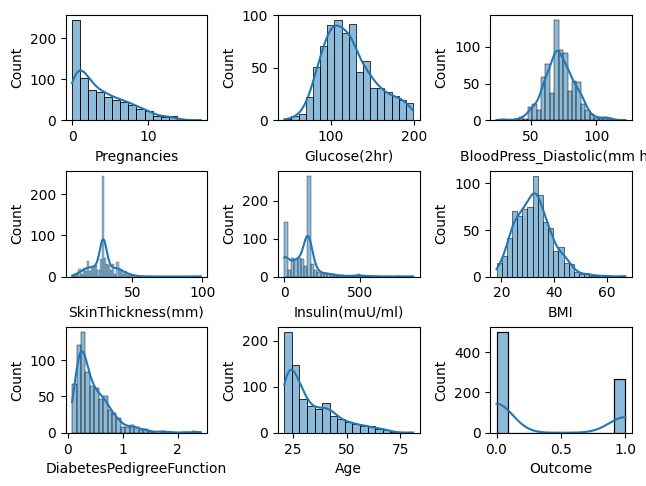

In [8]:
fig , axes = plt.subplots(3,3)
col = list(df.columns)
axes = axes.flatten()
for i, co in enumerate(col):
    sns.histplot(data=df, x=co, ax=axes[i], kde=True) 
fig.tight_layout(pad=0.5)
plt.show()

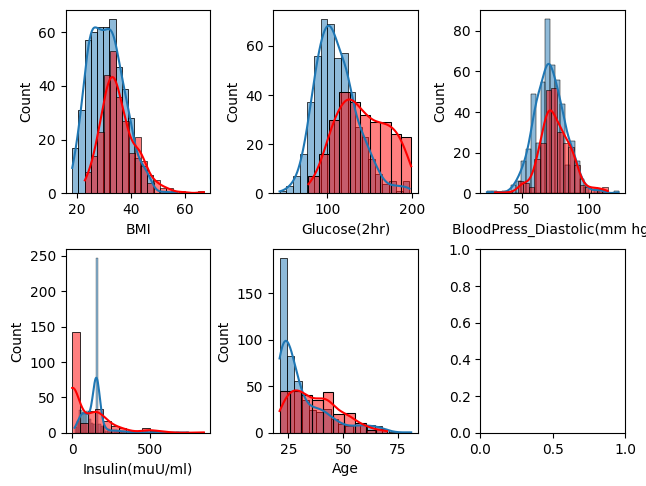

In [9]:
fig , axes = plt.subplots(2,3)
sns.histplot(df['BMI'][df['Outcome']==0],ax=axes[0,0],kde=True)
sns.histplot(df['BMI'][df['Outcome']==1],color='red',ax=axes[0,0],kde=True)
sns.histplot(df['Glucose(2hr)'][df['Outcome']==0],ax=axes[0,1],kde=True)
sns.histplot(df['Glucose(2hr)'][df['Outcome']==1],color='red',ax=axes[0,1],kde=True)
sns.histplot(df['BloodPress_Diastolic(mm hg)'][df['Outcome']==0],ax=axes[0,2],kde=True)
sns.histplot(df['BloodPress_Diastolic(mm hg)'][df['Outcome']==1],color='red',ax=axes[0,2],kde=True)
sns.histplot(df['Insulin(muU/ml)'][df['Outcome']==0],ax=axes[1,0],kde=True)
sns.histplot(df['Insulin(muU/ml)'][df['Outcome']==1],color='red',ax=axes[1,0],kde=True)
sns.histplot(df['Age'][df['Outcome']==0],ax=axes[1,1],kde=True)
sns.histplot(df['Age'][df['Outcome']==1],color='red',ax=axes[1,1],kde=True)
fig.tight_layout(pad=0.5)

In [10]:
#Glucose levels are higher in diabetic patient as observed (mean towards larger / skewed towards right)
#in BMI non diabetic people tend to show low BMI(log nomral curve graph for it) and diabetic people have BMI in higher range
#from our dataset majority of diabetic people have 0 insulin(type 1 diabetes)
#Higher age people is more prone to diabetes
#BP also appears to be lower in Diabetic people

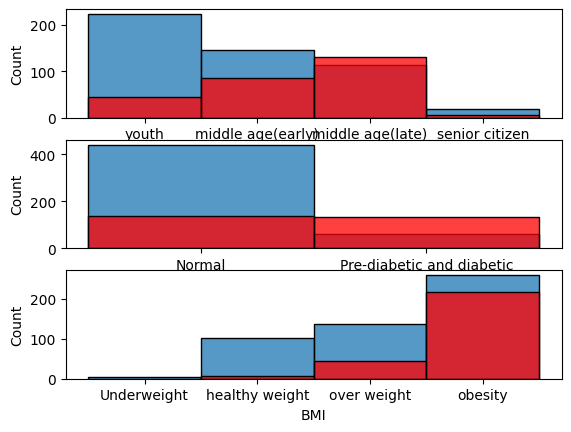

In [11]:
fig1 , ax1 = plt.subplots(3)
bins1 = [0,12,17,25,35,60,110]
labels1 = ['child','teen','youth','middle age(early)','middle age(late)','senior citizen']
bins2 = [0,140,300]
labels2 = ['Normal','Pre-diabetic and diabetic']
bins3 = [0,18.5,25,30,68]
labels3 = ['Underweight','healthy weight','over weight','obesity']
age_group = pd.cut(df['Age'],bins1,labels=labels1)
glucose_scales = pd.cut(df['Glucose(2hr)'],bins2,labels=labels2)
BMI_cat = pd.cut(df['BMI'],bins3,labels =labels3)
sns.histplot(age_group[df['Outcome']==0],ax=ax1[0])
sns.histplot(age_group[df['Outcome']==1],ax=ax1[0],color='red')
sns.histplot(glucose_scales[df['Outcome']==0],ax=ax1[1])
sns.histplot(glucose_scales[df['Outcome']==1],ax=ax1[1],color='red')
sns.histplot(BMI_cat[df['Outcome']==0],ax=ax1[2])
sns.histplot(BMI_cat[df['Outcome']==1],ax=ax1[2],color='red')
fig.tight_layout(pad=0.5)
plt.show()
#older people tend to be more diabetic , particularly late middle age people
#glucose levels cant be below 140 range and still be referred as diabetic (this shows disparency in surveical data)
#our surveyed population is obese in majority (a noise in interference of data)
#glucose ranging and BMI ranging is observed to be not soo acurate soo not taking account of them in prediction

In [12]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
normalised_df = pd.DataFrame(norm.fit_transform(outrm_df))
normalised_df.columns = df.columns
sns.heatmap(normalised_df.corr(),annot=True,cmap='mako')

<Axes: >

Observations from heatmap
1. Blood press and insulin are negatively corr (significant)
2. Glucose and insulin are negatively corr (significant)
3. age and pregnancy are directly prop (not significant for diabetes)
4. BMI and skin thickness related +vely
5. Many features are not much directly related to outcome , but indirectly together they constitute
6. i dont see much importance of pregnancy in prediction of outcome soo i am dropping it
7. BMI is highly related to majority of parameters being glucose,BP,skint,pedigree therefor it's a strong factor in determination of diab 


In [22]:
#Doing predictions with the models now
outrm_df = outrm_df.drop('Pregnancies',axis=1)
#RANDOMFORESTClass

from sklearn.model_selection import train_test_split
X = outrm_df[outrm_df.columns[:-1]]
y = outrm_df[outrm_df.columns[-1]]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8387096774193549

In [14]:
#KNC
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred1)

0.7741935483870968

In [15]:
#Logistic regression
normalised_df = normalised_df.drop('Pregnancies',axis=1)
from sklearn.model_selection import train_test_split
X2 = normalised_df[normalised_df.columns[:-1]]
y2 = outrm_df[outrm_df.columns[-1]]
X_train2,X_test2,y_train2,y_test2= train_test_split(X2,y2,test_size=0.20)
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
metrics.accuracy_score(y_test2,y_pred2)

0.6451612903225806

In [16]:
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train2,y_train2)
xgb_test = xgb.DMatrix(X_test2,y_test2)
params = {'objective': 'binary:logistic','max_depth': 3,'learning_rate': 0.1,}
mod = xgb.train(params=params,dtrain=xgb_train,num_boost_round=50)
pred = mod.predict(xgb_test)
pred = pred.astype("int64")
metrics.accuracy_score(y_test,pred)

0.7741935483870968

Most efficient model is : Randomforest

In [17]:
#used xgboost for randomforest to check whether model accuracy increases
params2 = {"learning_rate": 0.1,"max_depth": 3,"num_parallel_tree": 500,"objective": "binary:logistic","tree_method": "hist"}
mod2 = xgb.train(params=params2,dtrain=xgb_train,num_boost_round=50)
pred2 = mod2.predict(xgb_test)
pred2 = pred2.astype("int64")
metrics.accuracy_score(y_test,pred2)

0.7741935483870968

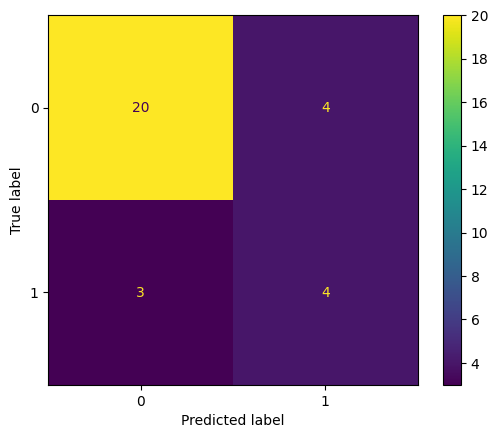

In [18]:
c_matrix = metrics.confusion_matrix(y_test,y_pred)
c_display = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
c_display.plot()
plt.show()


In [26]:
details = input("Enter the details separated by commas: ")
details = np.array([float(x) for x in details.split(',')])
details = details.reshape(1, -1)
prediction = clf.predict(details)
prediction


Enter the details separated by commas:  148,72,35,0,33.6,0.627,50	


array([0])